In [1]:
import numpy as np
from sklearn.datasets import make_sparse_spd_matrix
from scipy import linalg as LA
import pandas as pd
import time, os
import matplotlib.pyplot as plt

from pyinstrument import Profiler

from infoband.band_info import InfoCorrBand
from wlpy.covariance import Covariance
from utils.adpt_correlation_threshold import AdptCorrThreshold
from wlpy.gist import heatmap

import warnings
warnings.filterwarnings("ignore")

from my_api import *

# proposed estimator

In [2]:
# profiler = Profiler()
# profiler.start()

cv_option, verbose = 'brute', False
N = 100
T = 100
rho = 0.8
S = gen_S_AR1(N = N, rho = rho)
R = cov2cor(S)

seed = 1
rng = np.random.RandomState(seed) if 1 else np.random
X = rng.multivariate_normal(mean = np.zeros(N), cov = S, size = T)

# profiler.stop()
# profiler.print()

fro 0.5 random None
[462.1844714742427, 426.9985775669668, 371.1733349753868, 328.2204954541817, 302.25787072395633, 282.8789265969645, 268.1363353777808, 254.74850451881116, 247.48262963219858, 239.91254705840478, 234.9982429272233, 233.2581900335515, 231.40124103282267, 231.58047504650025, 231.8517424698437, 232.44063839303195, 232.97293806805166, 234.80862202099937, 236.32703220833685, 238.906905802952, 241.10168758649573, 243.21885851057476, 245.65939933297884, 247.84187291810875, 250.3716982095208, 252.74915273459504, 255.14318857418704, 258.0420642887182, 260.58970407775513, 263.4988885546177, 266.9635624833937, 269.1221714978376, 272.18224168575284, 275.46523840088514, 278.02051114034487, 280.4320219962099, 283.19675698006745, 286.1419799311093, 289.20983644807444, 291.51137136226765, 292.87470805914325, 292.89755945647187, 295.4101461254134, 297.04676957454535, 297.3959454547502, 299.3113719472377, 301.5830250644966, 302.9192814809341, 304.26432619758737, 306.7380906300193, 309

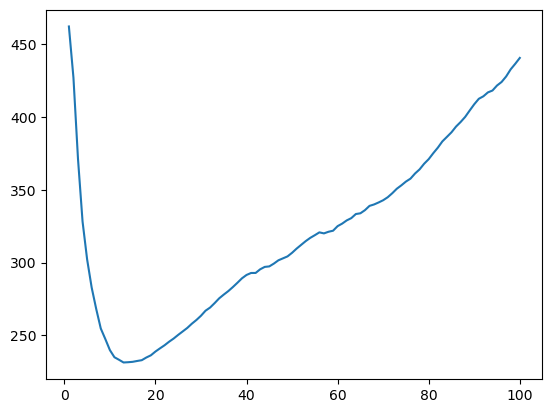

0 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:28:41  Samples:  17427
 /_//_/// /_\ / //_// / //_'/ //     Duration: 17.752    CPU time: 68.594
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

17.752 <module>  None
└─ 17.589 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 17.588 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 17.364 <listcomp>  infoband\band_info.py:158
         └─ 17.364 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 11.723 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 9.426 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 9.007 InfoCorrBand.__compute_order

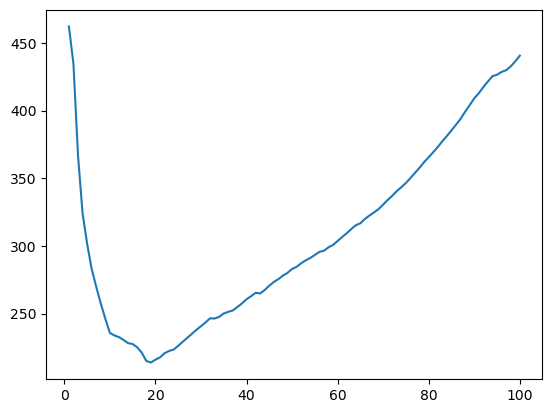

1 19

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:29:02  Samples:  19869
 /_//_/// /_\ / //_// / //_'/ //     Duration: 20.445    CPU time: 77.375
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

20.445 <module>  None
└─ 20.300 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 20.285 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      ├─ 19.881 <listcomp>  infoband\band_info.py:158
      │  └─ 19.880 InfoCorrBand.__loss_func  infoband\band_info.py:218
      │     ├─ 13.422 InfoCorrBand.__init__  infoband\band_info.py:37
      │     │  ├─ 10.884 InfoCorrBand.feed_info  infoband\band_info.py:74
      │     │  │  ├─ 10.425 InfoCorrBand.__compute_ord

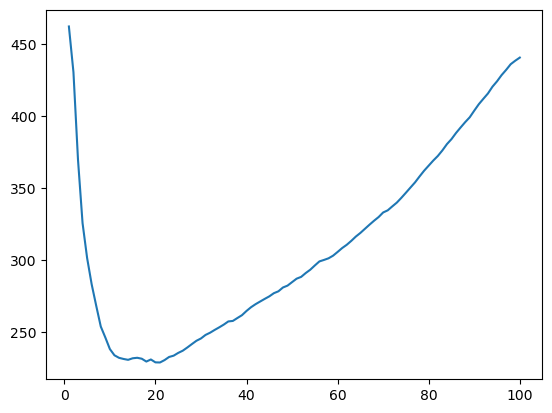

2 21

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:29:27  Samples:  25114
 /_//_/// /_\ / //_// / //_'/ //     Duration: 25.752    CPU time: 97.188
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

25.751 <module>  None
└─ 25.563 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 25.562 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 25.298 <listcomp>  infoband\band_info.py:158
         └─ 25.297 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 17.018 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 14.060 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 13.548 InfoCorrBand.__compute_ord

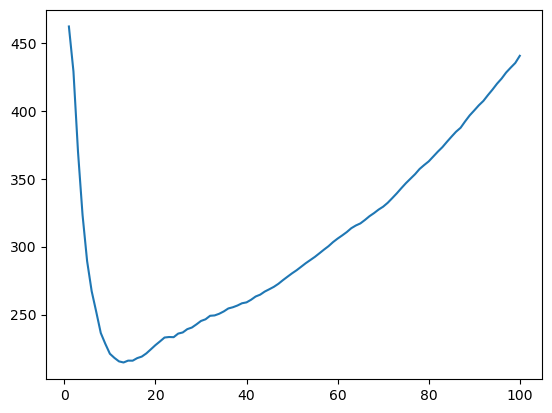

3 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:29:59  Samples:  19745
 /_//_/// /_\ / //_// / //_'/ //     Duration: 20.218    CPU time: 75.156
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

20.218 <module>  None
└─ 20.063 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 20.062 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 19.899 <listcomp>  infoband\band_info.py:158
         └─ 19.898 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 13.486 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.850 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 10.348 InfoCorrBand.__compute_ord

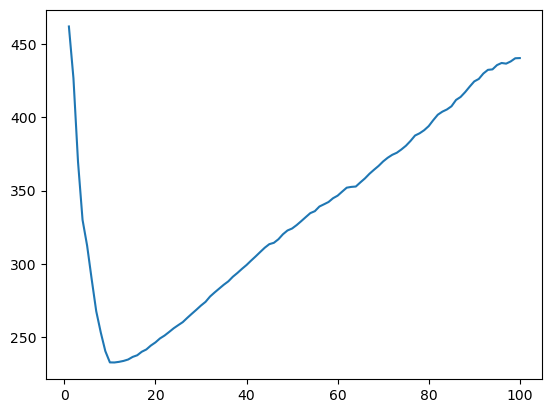

4 11

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:30:23  Samples:  23683
 /_//_/// /_\ / //_// / //_'/ //     Duration: 26.950    CPU time: 84.562
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

26.949 <module>  None
└─ 26.805 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 26.804 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 26.486 <listcomp>  infoband\band_info.py:158
         └─ 26.485 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 17.313 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 12.849 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 12.272 InfoCorrBand.__compute_ord

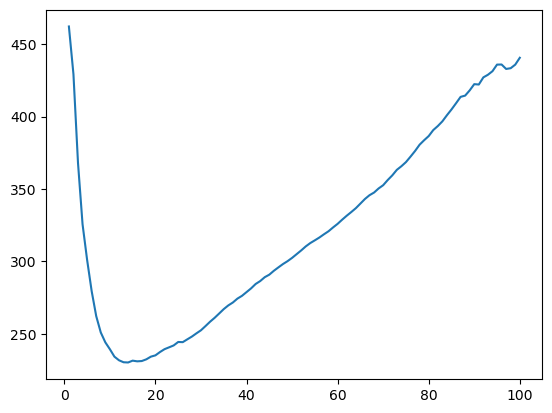

5 14

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:30:55  Samples:  18789
 /_//_/// /_\ / //_// / //_'/ //     Duration: 18.977    CPU time: 72.625
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

18.976 <module>  None
└─ 18.832 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 18.831 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 18.684 <listcomp>  infoband\band_info.py:158
         └─ 18.683 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.884 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.728 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 10.301 InfoCorrBand.__compute_ord

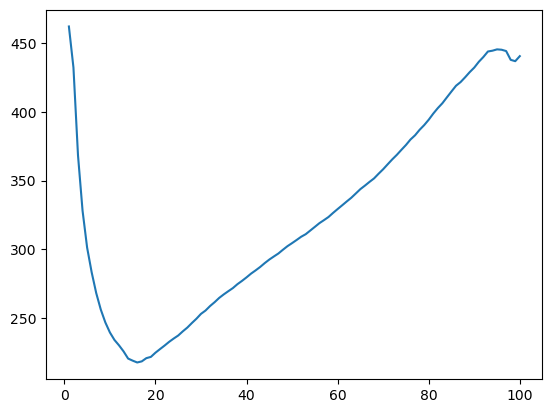

6 16

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:31:17  Samples:  18156
 /_//_/// /_\ / //_// / //_'/ //     Duration: 18.325    CPU time: 69.438
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

18.326 <module>  None
└─ 18.191 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 18.190 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 18.036 <listcomp>  infoband\band_info.py:158
         └─ 18.036 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.527 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.388 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 9.998 InfoCorrBand.__compute_orde

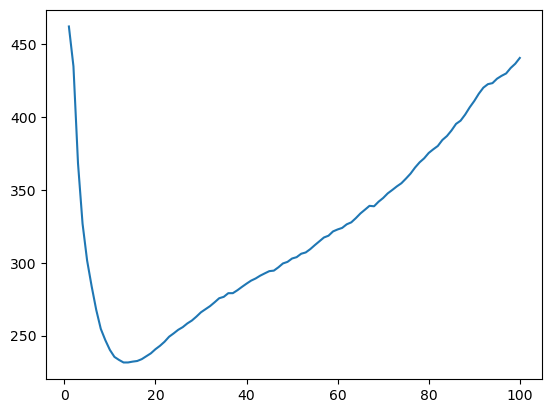

7 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:31:39  Samples:  18069
 /_//_/// /_\ / //_// / //_'/ //     Duration: 18.227    CPU time: 70.859
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

18.226 <module>  None
└─ 18.083 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 18.082 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 17.894 <listcomp>  infoband\band_info.py:158
         └─ 17.892 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.432 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.242 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 9.855 InfoCorrBand.__compute_orde

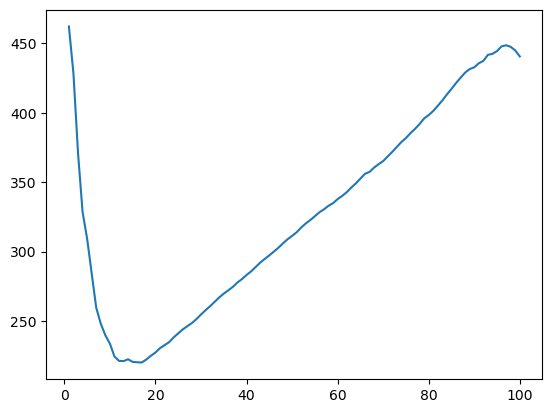

8 17

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:32:00  Samples:  18506
 /_//_/// /_\ / //_// / //_'/ //     Duration: 18.687    CPU time: 72.484
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

18.687 <module>  None
└─ 18.556 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 18.555 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 18.383 <listcomp>  infoband\band_info.py:158
         └─ 18.383 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.786 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.601 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 10.184 InfoCorrBand.__compute_ord

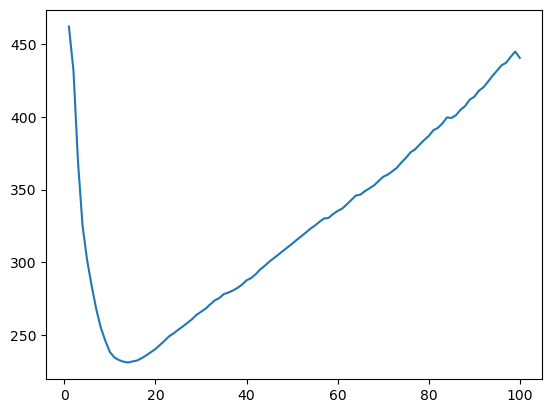

9 14

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:32:22  Samples:  17689
 /_//_/// /_\ / //_// / //_'/ //     Duration: 17.871    CPU time: 68.688
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

17.864 <module>  None
└─ 17.722 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 17.721 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 17.564 <listcomp>  infoband\band_info.py:158
         └─ 17.563 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.165 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.115 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 9.739 InfoCorrBand.__compute_orde

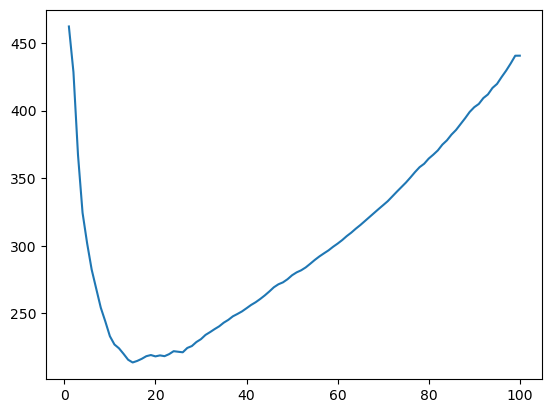

10 15

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:32:44  Samples:  18168
 /_//_/// /_\ / //_// / //_'/ //     Duration: 18.606    CPU time: 69.328
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

18.606 <module>  None
└─ 18.476 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 18.476 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 18.292 <listcomp>  infoband\band_info.py:158
         └─ 18.292 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.713 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.412 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 9.999 InfoCorrBand.__compute_ord

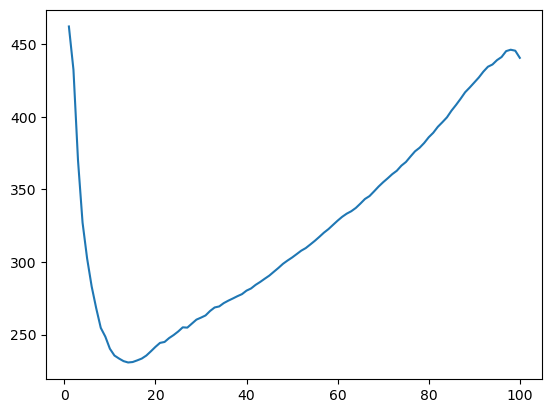

11 14

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:33:05  Samples:  18306
 /_//_/// /_\ / //_// / //_'/ //     Duration: 19.023    CPU time: 71.109
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

19.022 <module>  None
└─ 18.890 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 18.889 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 18.750 <listcomp>  infoband\band_info.py:158
         └─ 18.750 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.675 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.483 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 10.075 InfoCorrBand.__compute_or

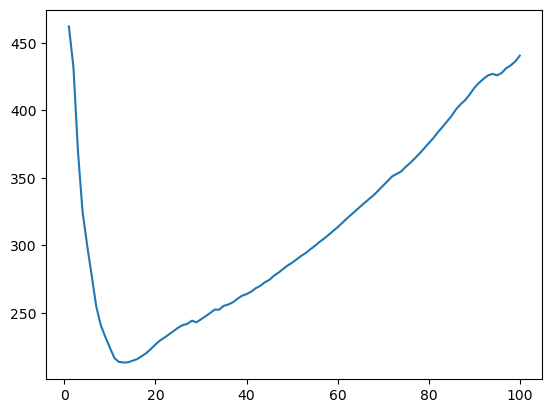

12 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:33:28  Samples:  19100
 /_//_/// /_\ / //_// / //_'/ //     Duration: 19.790    CPU time: 74.359
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

19.787 <module>  None
└─ 19.638 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 19.637 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 19.445 <listcomp>  infoband\band_info.py:158
         └─ 19.444 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 13.131 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.789 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 10.392 InfoCorrBand.__compute_or

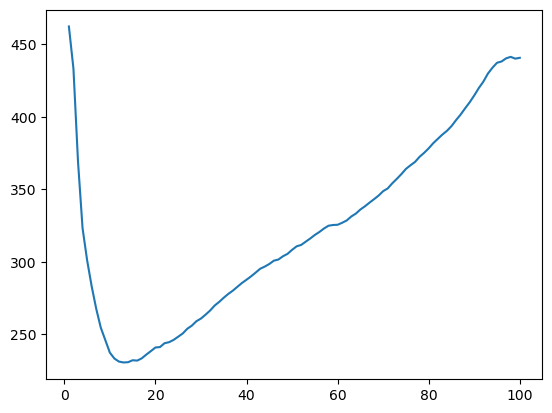

13 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:33:51  Samples:  23566
 /_//_/// /_\ / //_// / //_'/ //     Duration: 25.990    CPU time: 86.719
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

25.976 <module>  None
└─ 25.839 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 25.838 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 25.581 <listcomp>  infoband\band_info.py:158
         └─ 25.579 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 16.975 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 13.481 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 12.885 InfoCorrBand.__compute_or

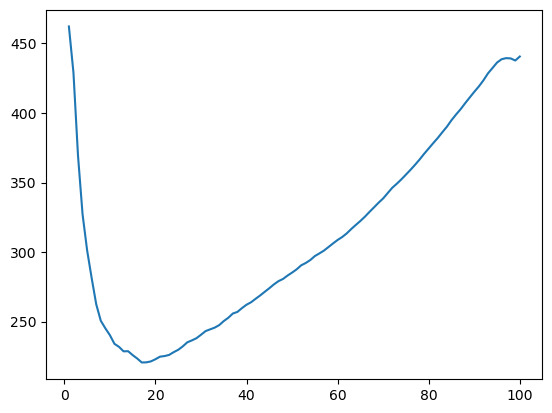

14 17

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:34:24  Samples:  27248
 /_//_/// /_\ / //_// / //_'/ //     Duration: 28.208    CPU time: 102.594
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

28.207 <module>  None
└─ 27.938 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 27.936 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 27.757 <listcomp>  infoband\band_info.py:158
         └─ 27.756 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 18.668 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 14.820 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 14.139 InfoCorrBand.__compute_o

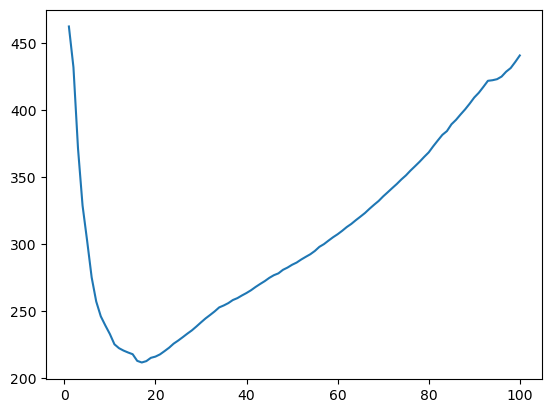

15 17

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:34:58  Samples:  19686
 /_//_/// /_\ / //_// / //_'/ //     Duration: 19.939    CPU time: 78.078
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

19.938 <module>  None
└─ 19.782 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 19.781 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 19.616 <listcomp>  infoband\band_info.py:158
         └─ 19.616 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 13.496 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.946 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 10.497 InfoCorrBand.__compute_or

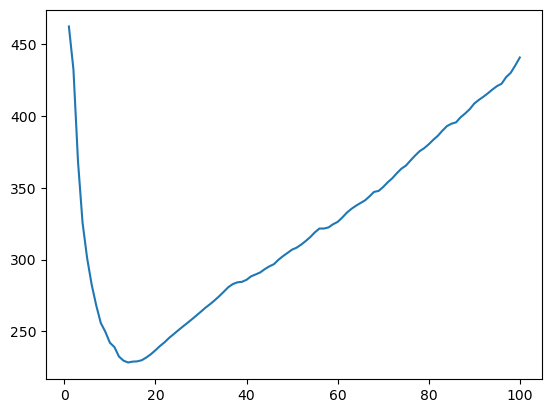

16 14

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:35:22  Samples:  18807
 /_//_/// /_\ / //_// / //_'/ //     Duration: 19.018    CPU time: 75.188
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

19.017 <module>  None
└─ 18.882 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 18.881 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 18.717 <listcomp>  infoband\band_info.py:158
         └─ 18.716 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 12.913 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 10.679 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 10.245 InfoCorrBand.__compute_or

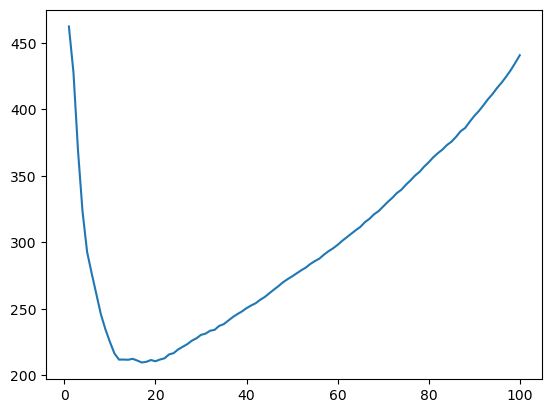

17 17

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:35:46  Samples:  20380
 /_//_/// /_\ / //_// / //_'/ //     Duration: 20.623    CPU time: 81.000
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

20.623 <module>  None
└─ 20.459 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 20.459 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 20.262 <listcomp>  infoband\band_info.py:158
         └─ 20.259 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 13.934 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 11.504 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 11.053 InfoCorrBand.__compute_or

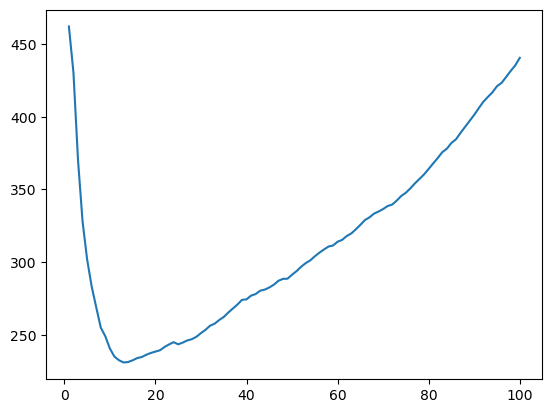

18 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:36:11  Samples:  25748
 /_//_/// /_\ / //_// / //_'/ //     Duration: 27.282    CPU time: 95.609
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

27.282 <module>  None
└─ 27.154 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 27.152 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      ├─ 26.803 <listcomp>  infoband\band_info.py:158
      │  └─ 26.802 InfoCorrBand.__loss_func  infoband\band_info.py:218
      │     ├─ 18.058 InfoCorrBand.__init__  infoband\band_info.py:37
      │     │  ├─ 14.385 InfoCorrBand.feed_info  infoband\band_info.py:74
      │     │  │  ├─ 13.803 InfoCorrBand.__compute_or

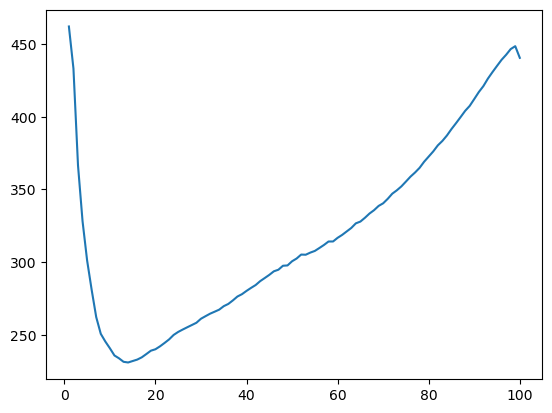

19 14

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:36:49  Samples:  29221
 /_//_/// /_\ / //_// / //_'/ //     Duration: 30.477    CPU time: 109.828
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

30.476 <module>  None
└─ 30.298 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 30.297 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 30.069 <listcomp>  infoband\band_info.py:158
         └─ 30.066 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 20.267 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 16.123 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 15.384 InfoCorrBand.__compute_o

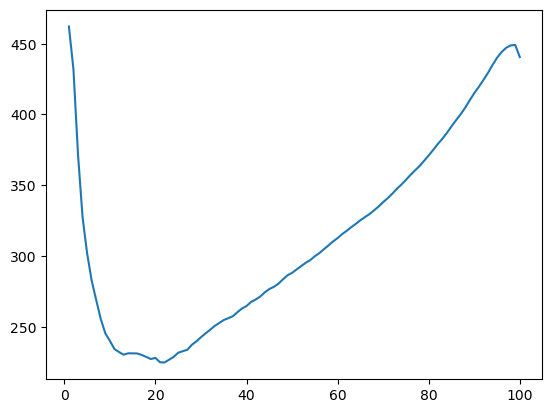

20 22

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:37:26  Samples:  25729
 /_//_/// /_\ / //_// / //_'/ //     Duration: 26.437    CPU time: 98.688
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

26.435 <module>  None
└─ 26.290 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 26.289 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 26.063 <listcomp>  infoband\band_info.py:158
         └─ 26.061 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 17.732 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 14.368 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 13.701 InfoCorrBand.__compute_or

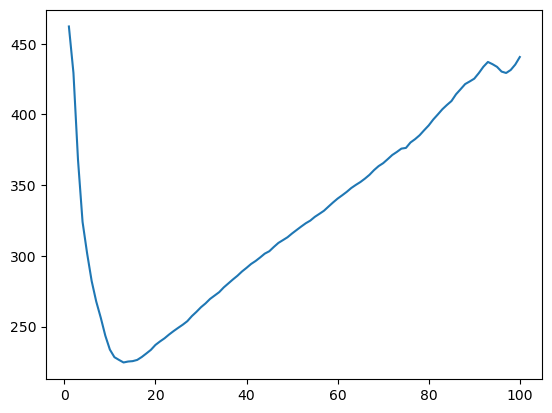

21 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:38:00  Samples:  21113
 /_//_/// /_\ / //_// / //_'/ //     Duration: 21.677    CPU time: 75.500
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

21.674 <module>  None
└─ 21.479 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 21.478 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      ├─ 21.184 <listcomp>  infoband\band_info.py:158
      │  └─ 21.184 InfoCorrBand.__loss_func  infoband\band_info.py:218
      │     ├─ 14.640 InfoCorrBand.__init__  infoband\band_info.py:37
      │     │  ├─ 12.039 InfoCorrBand.feed_info  infoband\band_info.py:74
      │     │  │  ├─ 11.600 InfoCorrBand.__compute_or

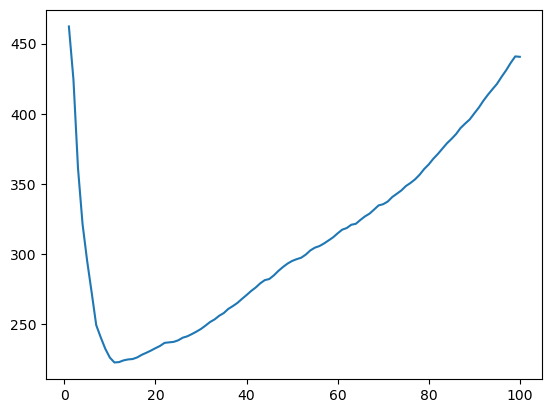

22 11

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:38:27  Samples:  26031
 /_//_/// /_\ / //_// / //_'/ //     Duration: 27.453    CPU time: 91.500
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

27.452 <module>  None
└─ 27.308 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 27.305 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 27.017 <listcomp>  infoband\band_info.py:158
         └─ 27.017 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 18.343 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 14.821 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 14.214 InfoCorrBand.__compute_or

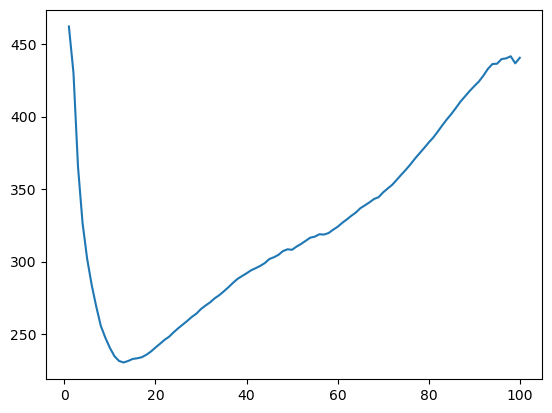

23 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:39:01  Samples:  25787
 /_//_/// /_\ / //_// / //_'/ //     Duration: 27.508    CPU time: 95.656
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

27.507 <module>  None
└─ 27.299 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 27.298 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 27.032 <listcomp>  infoband\band_info.py:158
         └─ 27.031 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 17.803 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 14.485 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 13.916 InfoCorrBand.__compute_or

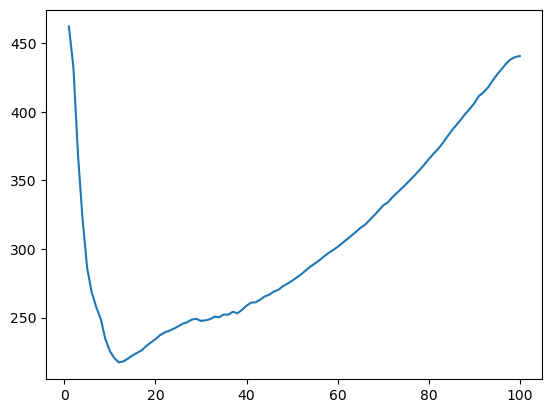

24 12

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:39:34  Samples:  23133
 /_//_/// /_\ / //_// / //_'/ //     Duration: 23.624    CPU time: 86.094
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

23.624 <module>  None
└─ 23.483 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 23.482 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 23.293 <listcomp>  infoband\band_info.py:158
         └─ 23.291 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 15.917 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 12.961 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 12.432 InfoCorrBand.__compute_or

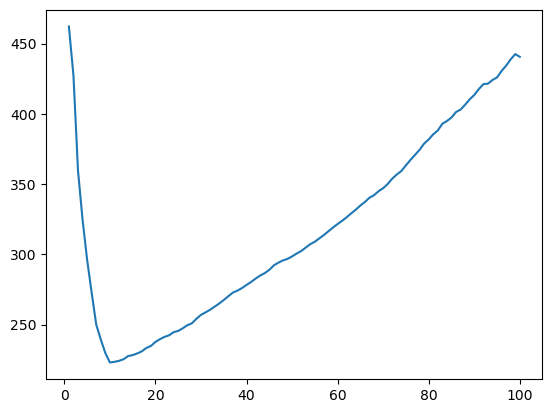

25 10

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:40:02  Samples:  22194
 /_//_/// /_\ / //_// / //_'/ //     Duration: 22.932    CPU time: 80.422
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

22.932 <module>  None
└─ 22.779 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 22.778 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 22.599 <listcomp>  infoband\band_info.py:158
         └─ 22.599 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 15.373 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 12.506 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 12.043 InfoCorrBand.__compute_or

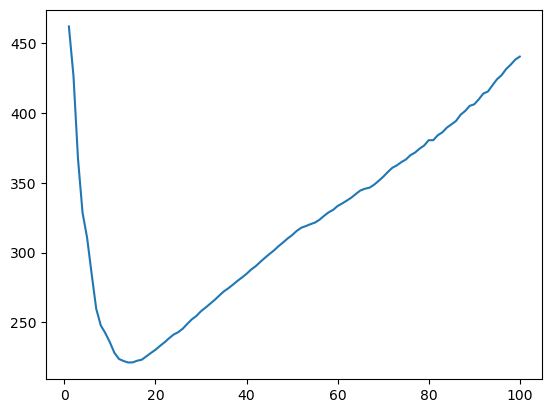

26 14

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:40:31  Samples:  20403
 /_//_/// /_\ / //_// / //_'/ //     Duration: 20.968    CPU time: 74.281
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

20.967 <module>  None
└─ 20.816 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 20.815 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 20.614 <listcomp>  infoband\band_info.py:158
         └─ 20.614 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 14.263 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 11.508 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 11.056 InfoCorrBand.__compute_or

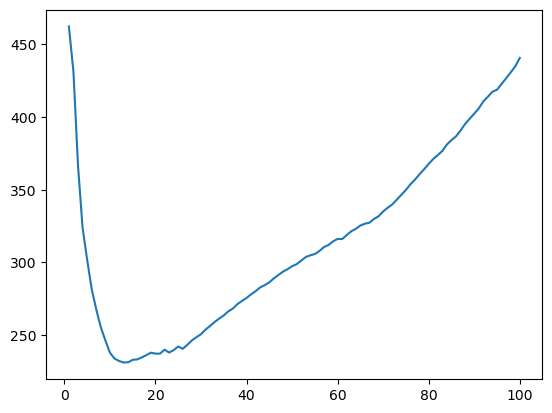

27 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:40:58  Samples:  28773
 /_//_/// /_\ / //_// / //_'/ //     Duration: 30.168    CPU time: 100.750
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

30.162 <module>  None
└─ 30.018 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 30.016 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 29.803 <listcomp>  infoband\band_info.py:158
         └─ 29.802 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 20.075 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 16.058 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 15.425 InfoCorrBand.__compute_o

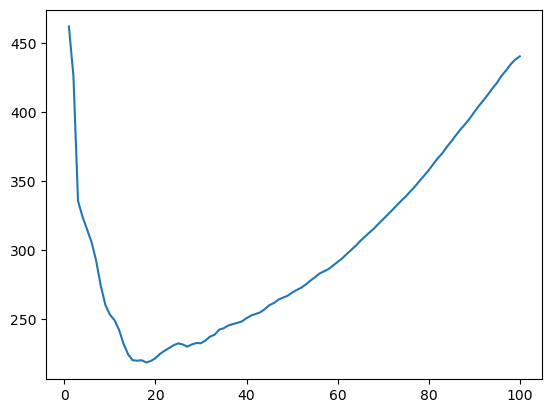

28 18

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:41:35  Samples:  24531
 /_//_/// /_\ / //_// / //_'/ //     Duration: 25.804    CPU time: 85.969
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

25.803 <module>  None
└─ 25.636 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 25.635 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 25.388 <listcomp>  infoband\band_info.py:158
         └─ 25.387 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 17.471 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 13.852 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 13.318 InfoCorrBand.__compute_or

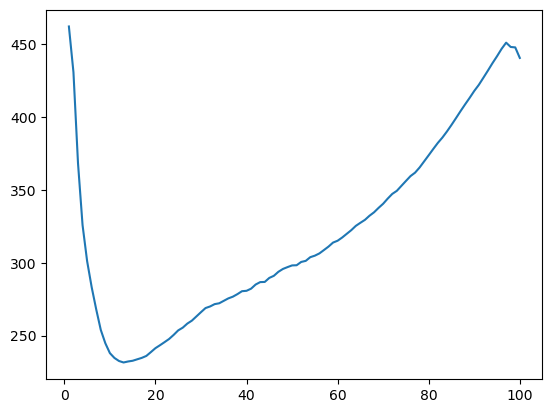

29 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:42:09  Samples:  27228
 /_//_/// /_\ / //_// / //_'/ //     Duration: 27.950    CPU time: 98.359
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

27.949 <module>  None
├─ 27.591 InfoCorrBand.auto_fit  infoband\band_info.py:269
│  └─ 27.588 InfoCorrBand.k_by_cv  infoband\band_info.py:140
│     ├─ 27.193 <listcomp>  infoband\band_info.py:158
│     │  └─ 27.192 InfoCorrBand.__loss_func  infoband\band_info.py:218
│     │     ├─ 18.623 InfoCorrBand.__init__  infoband\band_info.py:37
│     │     │  ├─ 15.133 InfoCorrBand.feed_info  infoband\band_info.py:74
│     │     │  │  ├─ 14.476 InfoCorrBand.__compute_or

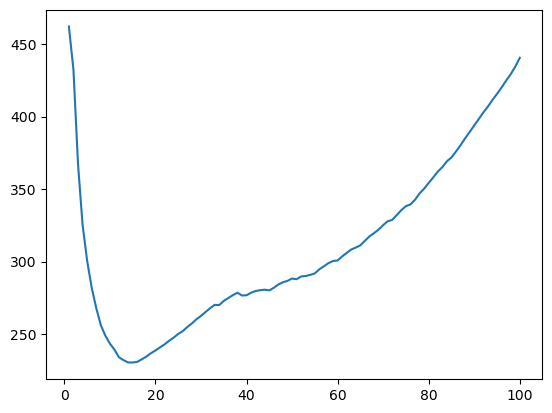

30 15

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:42:44  Samples:  25914
 /_//_/// /_\ / //_// / //_'/ //     Duration: 27.105    CPU time: 95.609
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

27.104 <module>  None
└─ 26.844 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 26.841 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 26.529 <listcomp>  infoband\band_info.py:158
         └─ 26.528 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 18.130 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 14.751 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 14.148 InfoCorrBand.__compute_or

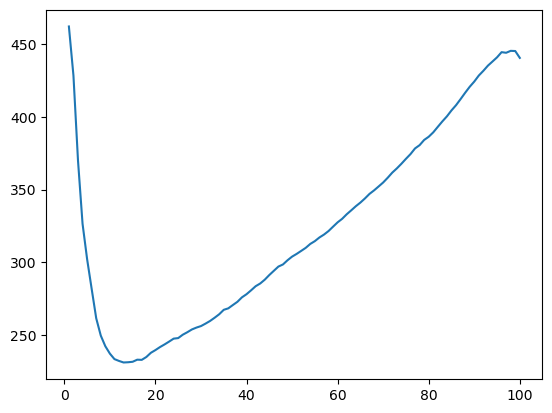

31 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:43:25  Samples:  31344
 /_//_/// /_\ / //_// / //_'/ //     Duration: 33.133    CPU time: 116.906
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

33.131 <module>  None
└─ 32.858 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 32.856 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 32.507 <listcomp>  infoband\band_info.py:158
         └─ 32.507 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 21.806 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 17.257 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 16.505 InfoCorrBand.__compute_o

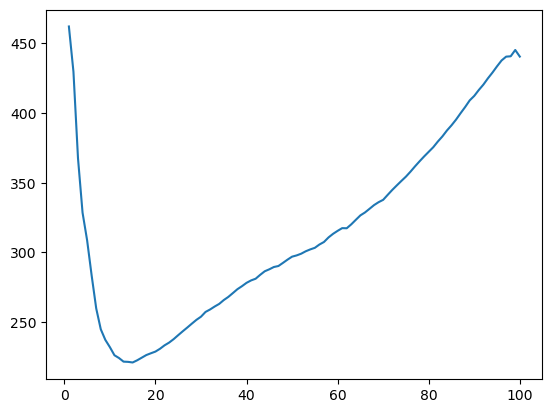

32 15

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:44:23  Samples:  23644
 /_//_/// /_\ / //_// / //_'/ //     Duration: 24.425    CPU time: 89.156
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

24.423 <module>  None
└─ 24.201 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 24.200 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      └─ 23.936 <listcomp>  infoband\band_info.py:158
         └─ 23.935 InfoCorrBand.__loss_func  infoband\band_info.py:218
            ├─ 16.275 InfoCorrBand.__init__  infoband\band_info.py:37
            │  ├─ 13.411 InfoCorrBand.feed_info  infoband\band_info.py:74
            │  │  ├─ 12.858 InfoCorrBand.__compute_or

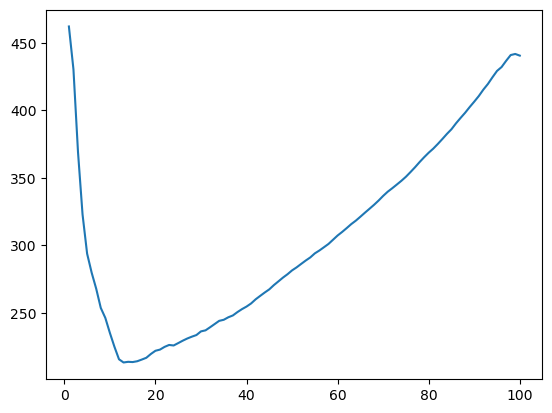

33 13

  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:45:08  Samples:  25908
 /_//_/// /_\ / //_// / //_'/ //     Duration: 27.254    CPU time: 94.000
/   _/                      v4.4.0

Program: d:\anaconda3\envs\simu\lib\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9013 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"aa8993fc-fde3-4aca-bd52-ea37619ac787" --shell=9007 --transport="tcp" --iopub=9014 --f=c:\Users\lx\AppData\Roaming\jupyter\runtime\kernel-v2-11192Iq1fwfLO9YBF.json

27.252 <module>  None
└─ 27.033 InfoCorrBand.auto_fit  infoband\band_info.py:269
   └─ 27.031 InfoCorrBand.k_by_cv  infoband\band_info.py:140
      ├─ 26.358 <listcomp>  infoband\band_info.py:158
      │  └─ 26.357 InfoCorrBand.__loss_func  infoband\band_info.py:218
      │     ├─ 18.035 InfoCorrBand.__init__  infoband\band_info.py:37
      │     │  ├─ 14.593 InfoCorrBand.feed_info  infoband\band_info.py:74
      │     │  │  ├─ 14.011 InfoCorrBand.__compute_or

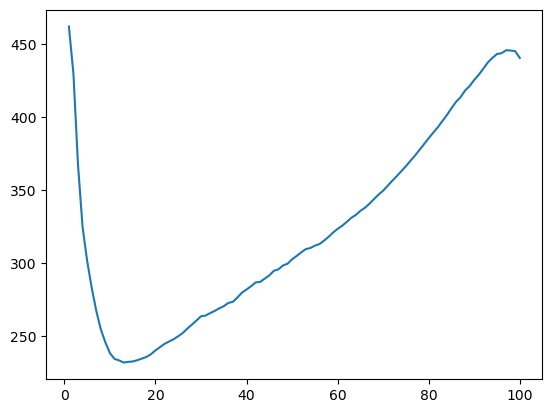

34 13


In [3]:
for ord in ['fro', 2]:
    for eta in [0.5, 0.8, 0.95, 1]:
        draw_type, near_factor = ('random', None)
        err_cor = []
        err_cov = []
        
        print(ord, eta, draw_type, near_factor)
        
        for i in range(100): 
            profiler = Profiler()
            profiler.start()
            
            L = gen_L(S, eta, draw_type = draw_type, is_random = 0, near_factor = near_factor, rand_seed = i)
            c = InfoCorrBand(X, L, num_cv = 50)
            R_est, S_est, k = c.auto_fit(cv_option, verbose)
            
            print(i, k)
            profiler.stop()
            profiler.print()
            
            err_cor.append(LA.norm(R - R_est, ord))
            err_cov.append(LA.norm(S - S_est, ord))
        err_cor = err_cor / LA.norm(R, ord)
        err_cov = err_cov / LA.norm(S, ord)
        
        save_data_fig(err_cor, ord, 'cor', draw_type, eta, N, T, rho, near_factor, is_save = 1)
        save_data_fig(err_cov, ord, 'cov', draw_type, eta, N, T, rho, near_factor, is_save = 1)

# Other method

In [30]:
N = 500
T = 300
rho = 0.95
S = gen_S_AR1(N = N, rho = rho)
R = cov2cor(S)
seed = 1
rng = np.random.RandomState(seed) if 1 else np.random
X = rng.multivariate_normal(mean = np.zeros(N), cov = S, size = T)

In [31]:
# G_zero = np.zeros((N, N))
G_zero = np.ones((N, N)) - np.eye(N)
m = AdptCorrThreshold(pd.DataFrame(X), G_zero)

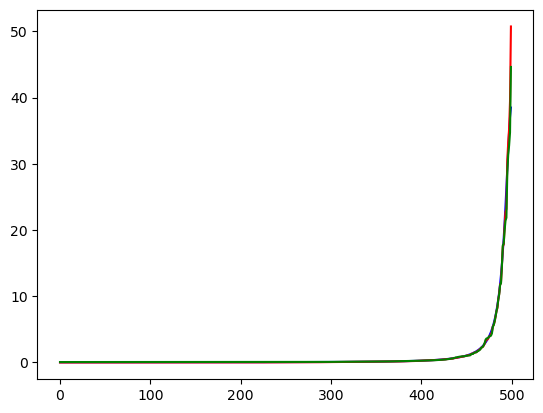

In [40]:
plt.plot(np.linalg.eigvals(S)[::-1], color = 'blue');
plt.plot(np.sort(np.linalg.eigvals(m.sample_cov())), color = 'red');
plt.plot(np.sort(np.linalg.eigvals(m.nonlin_shrink())), color = 'green');
# plt.plot(np.sort(np.linalg.eigvals(m.lw_lin_shrink())), color = 'purple');